# Filamentous Fungi Cell Phenotyping using Meta's DINO

In [20]:
!pip install scikit-image

  Using cached scikit_image-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.7 MB)
  Using cached tifffile-2023.9.26-py3-none-any.whl (222 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

compound_fraction_number                              plate_id   
0                      NaN  fc5b2f8d-dd12-495e-8fef-a69e1ab4c317  \
1                      NaN  67c03d72-d8b3-44f4-86d4-cd003905634a   
2                      NaN  134012ad-4e9b-483e-87ed-fcc83711faff   
3                      NaN  134012ad-4e9b-483e-87ed-fcc83711faff   
4                      NaN  32e1c64f-97b7-433b-8cf7-c5419c3b86a3   

                             section_id  site modality_name  col   
0  9a9b0f1e-135c-48ef-9d72-5afb35bd4952     4           WGA   10  \
1  3e73c327-497a-467b-9572-ecee8b18cc20     2           CFW    4   
2  d3fb9c6e-9e25-43ba-a452-dbb88e94b1b5     7           CFW   12   
3  d29d8a85-b3a9-4eb5-82cf-165c736bd650     9           CFW   12   
4  fd57e84c-3047-4342-a4f3-88f81b64915c     6           WGA    1   

                     cell_name                          timepoint_id   
0  Botrytis cinerea Pers. 1801  778d6dc0-0414-42d0-bdf8-dc3348515304  \
1  Botrytis cinerea Pers. 1801  b28eb622-09cb-4cb8-9e8d-390ed6ec2604   
2  Botrytis cinerea Pers. 1801  e559650a-1f03-482c-b6a9-8a3acfef82f4   
3  Botrytis cinerea Pers. 1801  e559650a-1f03-482c-b6a9-8a3acfef82f4   
4  Botrytis cinerea Pers. 1801  57feac49-c9d1-4ee2-bc53-9f2c57e7b74b   

   modality_target tp_time            plate_name row   
0           Chitin     NaN  LDtest-DataGen-24h-2   G  \
1  Glucans, Chitin     NaN         PolyoxB-Caspo   C   
2  Glucans, Chitin     NaN  LDtest-DataGen-24h-1   H   
3  Glucans, Chitin     NaN  LDtest-DataGen-24h-1   D   
4           Chitin     NaN       Azoxy-Bix-Fluop   H   

                                     id cell_code       stack_name   
0  13dec1e2-e1d7-493f-80f1-90ce4acdc02d    BOTRCI  NileRed_WGA_CFW  \
1  6ec288ea-0755-4eb3-be10-a31a238fdcbe    BOTRCI  WGA_NileRed_CFW   
2  a4c64f8d-9b17-442f-95b5-3ec18580c2fd    BOTRCI  NileRed_WGA_CFW   
3  ba1df4af-74ae-4387-b9cb-ab2227a0cd8f    BOTRCI  NileRed_WGA_CFW   
4  c3e289ea-4234-493e-8e41-a7fe6b2c5cf3    BOTRCI  NileRed_WGA_CFW   

   annotation          category  phenotype   
0           3  Apical cell wall    ACWapex  \
1           2         Cell wall    CWsepta   
2           3         Cell wall  CFWbright   
3           2         Cell wall    CWsepta   
4           1  Apical cell wall    WGAweak   

                                                 uri  
0  file:///images/13dec1e2-e1d7-493f-80f1-90ce4ac...  
1  file:///images/6ec288ea-0755-4eb3-be10-a31a238...  
2  file:///images/a4c64f8d-9b17-442f-95b5-3ec1858...  
3  file:///images/ba1df4af-74ae-4387-b9cb-ab2227a...  
4  file:///images/c3e289ea-4234-493e-8e41-a7fe6b2...

In [5]:
print(df['modality_name'].unique())

['WGA' 'CFW' 'BrightField' 'NileRed']


In [6]:
df.loc[df['modality_name'] == 'BrightField']

compound_fraction_number                              plate_id   
6                         NaN  134012ad-4e9b-483e-87ed-fcc83711faff  \
10                        NaN  134012ad-4e9b-483e-87ed-fcc83711faff   
13                        NaN  a44218fc-1e3e-425c-a680-d796a9a5ccd2   
14                        NaN  fc5b2f8d-dd12-495e-8fef-a69e1ab4c317   
15                        NaN  fc5b2f8d-dd12-495e-8fef-a69e1ab4c317   
...                       ...                                   ...   
6422                      NaN  32e1c64f-97b7-433b-8cf7-c5419c3b86a3   
6423                      NaN  fc5b2f8d-dd12-495e-8fef-a69e1ab4c317   
6428                      NaN  a44218fc-1e3e-425c-a680-d796a9a5ccd2   
6433                      NaN  32e1c64f-97b7-433b-8cf7-c5419c3b86a3   
6436                      NaN  32e1c64f-97b7-433b-8cf7-c5419c3b86a3   

                                section_id  site modality_name  col   
6     c4f8111f-9e92-4e94-8bac-a5c3fbeaa1b9     6   BrightField   10  \
10    c4f8111f-9e92-4e94-8bac-a5c3fbeaa1b9     3   BrightField    8   
13    71ee70e7-6b7e-4376-874a-8fa94845580f     6   BrightField    7   
14    f8d7aa86-2c49-4b8a-be60-b2b42cbbf873     2   BrightField    9   
15    d146a7fa-30d7-49d9-9de3-d44bf885b82d     2   BrightField    1   
...                                    ...   ...           ...  ...   
6422  ba0d5e25-0a08-4d69-8bfe-4841417e9cc5     4   BrightField    8   
6423  f8d7aa86-2c49-4b8a-be60-b2b42cbbf873     1   BrightField    8   
6428  33f74b26-b709-49e4-994c-3b49e7cba8f0     3   BrightField   10   
6433  ba0d5e25-0a08-4d69-8bfe-4841417e9cc5     4   BrightField    6   
6436  ba0d5e25-0a08-4d69-8bfe-4841417e9cc5     5   BrightField    8   

                        cell_name                          timepoint_id   
6     Botrytis cinerea Pers. 1801  e559650a-1f03-482c-b6a9-8a3acfef82f4  \
10    Botrytis cinerea Pers. 1801  e559650a-1f03-482c-b6a9-8a3acfef82f4   
13    Botrytis cinerea Pers. 1801  1d0d347e-b4ed-4d69-a610-55d4df3df6e5   
14    Botrytis cinerea Pers. 1801  778d6dc0-0414-42d0-bdf8-dc3348515304   
15    Botrytis cinerea Pers. 1801  778d6dc0-0414-42d0-bdf8-dc3348515304   
...                           ...                                   ...   
6422  Botrytis cinerea Pers. 1801  57feac49-c9d1-4ee2-bc53-9f2c57e7b74b   
6423  Botrytis cinerea Pers. 1801  778d6dc0-0414-42d0-bdf8-dc3348515304   
6428  Botrytis cinerea Pers. 1801  1d0d347e-b4ed-4d69-a610-55d4df3df6e5   
6433  Botrytis cinerea Pers. 1801  57feac49-c9d1-4ee2-bc53-9f2c57e7b74b   
6436  Botrytis cinerea Pers. 1801  57feac49-c9d1-4ee2-bc53-9f2c57e7b74b   

     modality_target tp_time            plate_name row   
6                NaN     NaN  LDtest-DataGen-24h-1   G  \
10               NaN     NaN  LDtest-DataGen-24h-1   G   
13               NaN     NaN  Fenpro-Prothio-Fenhe   E   
14               NaN     NaN  LDtest-DataGen-24h-2   A   
15               NaN     NaN  LDtest-DataGen-24h-2   B   
...              ...     ...                   ...  ..   
6422             NaN     NaN       Azoxy-Bix-Fluop   E   
6423             NaN     NaN  LDtest-DataGen-24h-2   A   
6428             NaN     NaN  Fenpro-Prothio-Fenhe   G   
6433             NaN     NaN       Azoxy-Bix-Fluop   E   
6436             NaN     NaN       Azoxy-Bix-Fluop   F   

                                        id cell_code       stack_name   
6     910dd971-aa62-4715-a4b3-d0491dbe97be    BOTRCI  NileRed_WGA_CFW  \
10    ef9ed2d7-3538-41da-b0b1-d7ee14703f60    BOTRCI  NileRed_WGA_CFW   
13    483f0384-d68e-4af2-abc8-8b6bebc5c956    BOTRCI  WGA_NileRed_CFW   
14    e2423838-ad52-4841-81b9-9700f92b60ae    BOTRCI  NileRed_WGA_CFW   
15    815c21ae-2399-4800-83e2-55bfbb91aebe    BOTRCI  NileRed_WGA_CFW   
...                                    ...       ...              ...   
6422  7cd96c4b-a893-40b5-a9f2-e9a34d4760ab    BOTRCI  NileRed_WGA_CFW   
6423  3fcfa5d5-833b-44af-a752-92c58d544fc6    BOTRCI  NileRed_WGA_CFW   
6428  5bdc1658-f0d9-4730-b961-aa19f75f8cfe  

In [7]:
df['uri'] = df.uri.str.replace('file:///', 's3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/')

In [8]:
df.head()

compound_fraction_number                              plate_id   
0                      NaN  fc5b2f8d-dd12-495e-8fef-a69e1ab4c317  \
1                      NaN  67c03d72-d8b3-44f4-86d4-cd003905634a   
2                      NaN  134012ad-4e9b-483e-87ed-fcc83711faff   
3                      NaN  134012ad-4e9b-483e-87ed-fcc83711faff   
4                      NaN  32e1c64f-97b7-433b-8cf7-c5419c3b86a3   

                             section_id  site modality_name  col   
0  9a9b0f1e-135c-48ef-9d72-5afb35bd4952     4           WGA   10  \
1  3e73c327-497a-467b-9572-ecee8b18cc20     2           CFW    4   
2  d3fb9c6e-9e25-43ba-a452-dbb88e94b1b5     7           CFW   12   
3  d29d8a85-b3a9-4eb5-82cf-165c736bd650     9           CFW   12   
4  fd57e84c-3047-4342-a4f3-88f81b64915c     6           WGA    1   

                     cell_name                          timepoint_id   
0  Botrytis cinerea Pers. 1801  778d6dc0-0414-42d0-bdf8-dc3348515304  \
1  Botrytis cinerea Pers. 1801  b28eb622-09cb-4cb8-9e8d-390ed6ec2604   
2  Botrytis cinerea Pers. 1801  e559650a-1f03-482c-b6a9-8a3acfef82f4   
3  Botrytis cinerea Pers. 1801  e559650a-1f03-482c-b6a9-8a3acfef82f4   
4  Botrytis cinerea Pers. 1801  57feac49-c9d1-4ee2-bc53-9f2c57e7b74b   

   modality_target tp_time            plate_name row   
0           Chitin     NaN  LDtest-DataGen-24h-2   G  \
1  Glucans, Chitin     NaN         PolyoxB-Caspo   C   
2  Glucans, Chitin     NaN  LDtest-DataGen-24h-1   H   
3  Glucans, Chitin     NaN  LDtest-DataGen-24h-1   D   
4           Chitin     NaN       Azoxy-Bix-Fluop   H   

                                     id cell_code       stack_name   
0  13dec1e2-e1d7-493f-80f1-90ce4acdc02d    BOTRCI  NileRed_WGA_CFW  \
1  6ec288ea-0755-4eb3-be10-a31a238fdcbe    BOTRCI  WGA_NileRed_CFW   
2  a4c64f8d-9b17-442f-95b5-3ec18580c2fd    BOTRCI  NileRed_WGA_CFW   
3  ba1df4af-74ae-4387-b9cb-ab2227a0cd8f    BOTRCI  NileRed_WGA_CFW   
4  c3e289ea-4234-493e-8e41-a7fe6b2c5cf3    BOTRCI  NileRed_WGA_CFW   

   annotation          category  phenotype   
0           3  Apical cell wall    ACWapex  \
1           2         Cell wall    CWsepta   
2           3         Cell wall  CFWbright   
3           2         Cell wall    CWsepta   
4           1  Apical cell wall    WGAweak   

                                                 uri  
0  s3://syedazi-demo-content-aiml-team/bayer-crop...  
1  s3://syedazi-demo-content-aiml-team/bayer-crop...  
2  s3://syedazi-demo-content-aiml-team/bayer-crop...  
3  s3://syedazi-demo-content-aiml-team/bayer-crop...  
4  s3://syedazi-demo-content-aiml-team/bayer-crop...

In [9]:
df_bf = df.loc[df['modality_name'] == 'BrightField']

In [10]:
df_bf['uri'].head(18)

6     s3://syedazi-demo-content-aiml-team/bayer-crop...
10    s3://syedazi-demo-content-aiml-team/bayer-crop...
13    s3://syedazi-demo-content-aiml-team/bayer-crop...
14    s3://syedazi-demo-content-aiml-team/bayer-crop...
15    s3://syedazi-demo-content-aiml-team/bayer-crop...
16    s3://syedazi-demo-content-aiml-team/bayer-crop...
17    s3://syedazi-demo-content-aiml-team/bayer-crop...
34    s3://syedazi-demo-content-aiml-team/bayer-crop...
40    s3://syedazi-demo-content-aiml-team/bayer-crop...
43    s3://syedazi-demo-content-aiml-team/bayer-crop...
44    s3://syedazi-demo-content-aiml-team/bayer-crop...
46    s3://syedazi-demo-content-aiml-team/bayer-crop...
49    s3://syedazi-demo-content-aiml-team/bayer-crop...
59    s3://syedazi-demo-content-aiml-team/bayer-crop...
63    s3://syedazi-demo-content-aiml-team/bayer-crop...
64    s3://syedazi-demo-content-aiml-team/bayer-crop...
65    s3://syedazi-demo-content-aiml-team/bayer-crop...
70    s3://syedazi-demo-content-aiml-team/bayer-

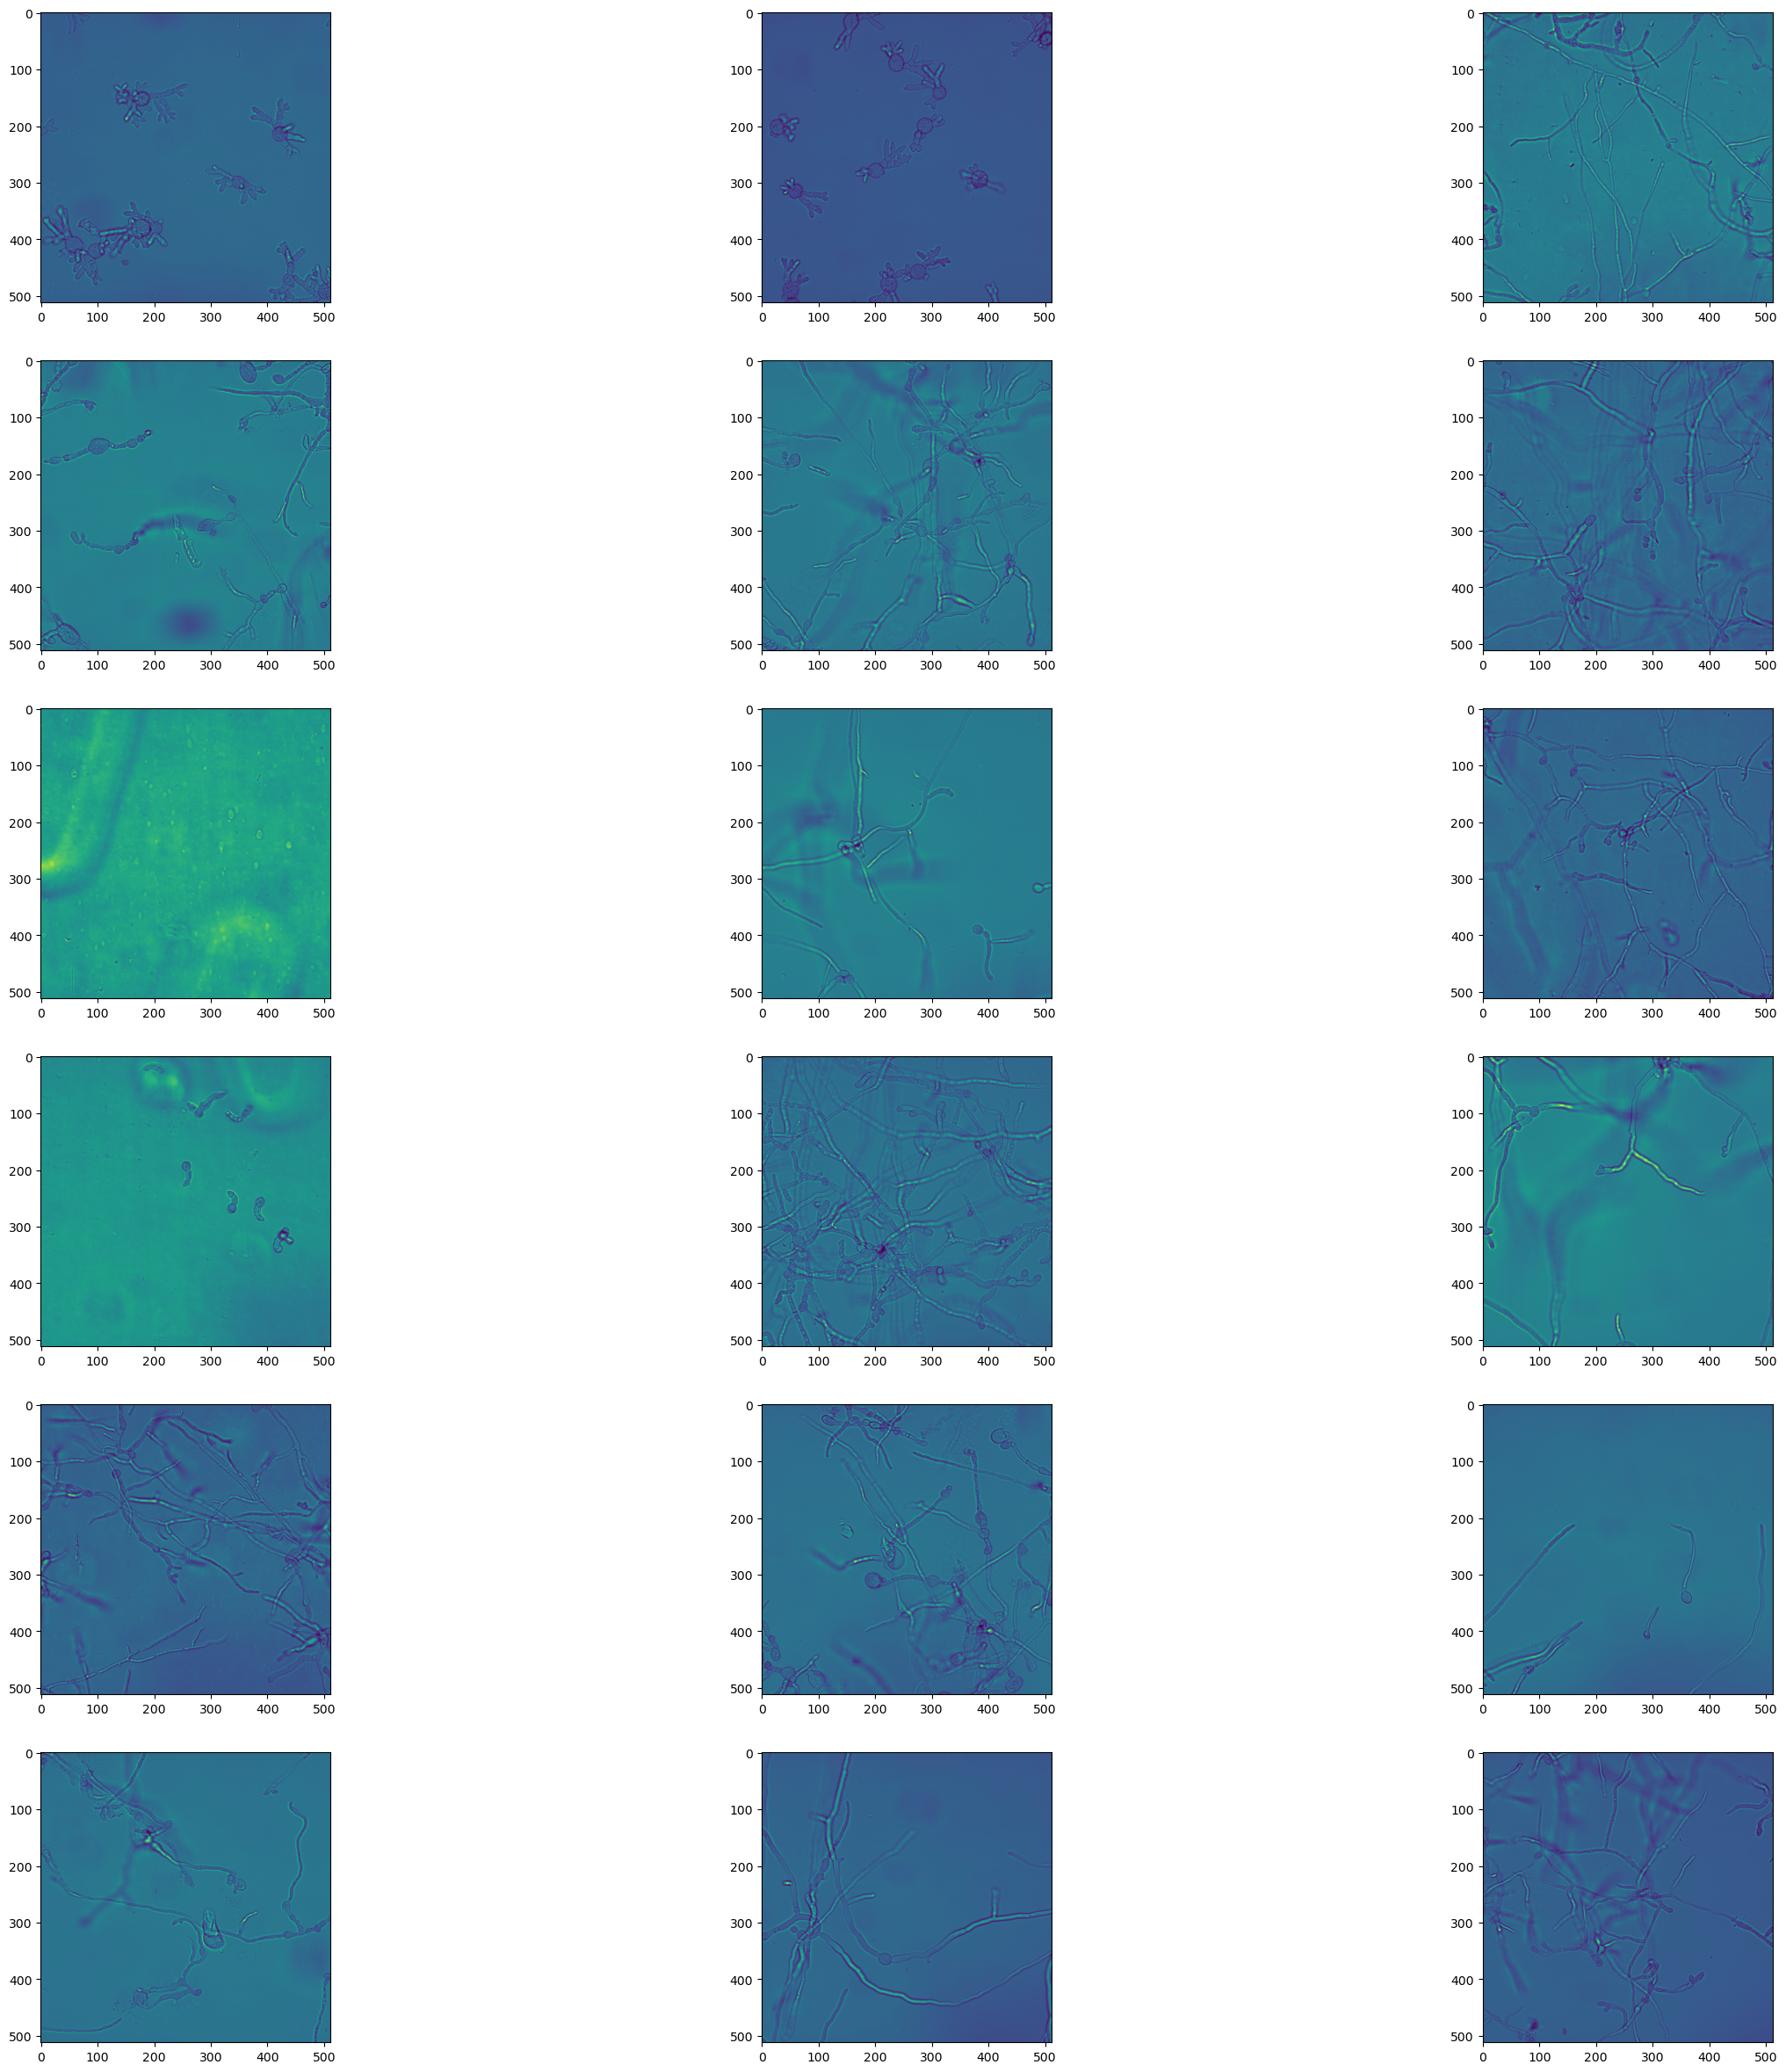

In [13]:
from urllib.parse import urlparse
from PIL import Image
from io import BytesIO
import numpy as np
import boto3
import matplotlib.pylab as plt

client = boto3.client('s3')

# create figure 
fig = plt.figure(figsize=(30, 30)) 
  
# setting values to rows and column variables 
rows = 6
columns = 3

n=1

for uri in df_bf['uri'].head(18):
    url = urlparse(uri)
    bucket = url.netloc
    key = url.path[1:]
    file_byte_string = client.get_object(Bucket=bucket, Key=key)["Body"].read()
    image = Image.open(BytesIO(file_byte_string))

    fig.add_subplot(rows, columns, n) 
    plt.imshow(image)    
    n=n+1

In [44]:
for uri in df_bf['uri'].head(1):
    url = urlparse(uri)
    bucket = url.netloc
    key = url.path[1:]
    file_byte_string = client.get_object(Bucket=bucket, Key=key)["Body"]
    image = np.array(PIL.Image.open(file_byte_string)).astype(np.uint16)
    image = image / np.iinfo(np.uint16).max

    print(image)



[[0.03294423 0.03299001 0.03360037 ... 0.03660639 0.03639277 0.03625544]
 [0.03288319 0.03286793 0.03303578 ... 0.03582818 0.03544671 0.03550774]
 [0.03283742 0.03323415 0.03327993 ... 0.03555352 0.03544671 0.03566033]
 ...
 [0.03431754 0.03579767 0.03532464 ... 0.03659113 0.03663691 0.03691157]
 [0.03363088 0.03476005 0.03447013 ... 0.03640803 0.03698787 0.0365301 ]
 [0.03439384 0.03379873 0.03350881 ... 0.03729305 0.03743038 0.03718624]]


s3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/910dd971-aa62-4715-a4b3-d0491dbe97be.tif


[ WARN:0@0.013] global loadsave.cpp:244 findDecoder imread_('s3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/910dd971-aa62-4715-a4b3-d0491dbe97be.tif'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

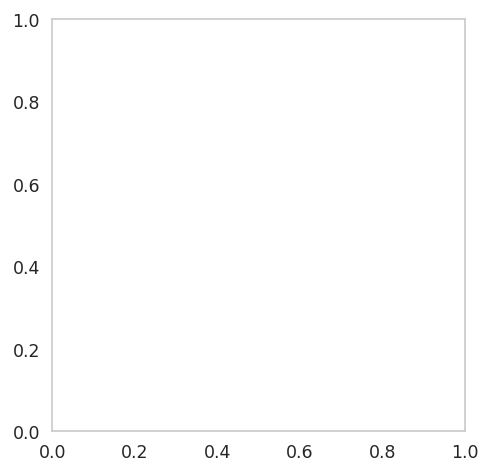

In [16]:
import PIL.Image
from io import BytesIO
import PIL
from IPython.display import display, Image
import cv2
import matplotlib.pylab as plt

# create figure 
fig = plt.figure(figsize=(30, 30)) 
  
# setting values to rows and column variables 
rows = 6
columns = 3

n=1
for uri in df_bf['uri'].head(18):
    print(uri)
    img = cv2.imread(uri, cv2.IMREAD_GRAYSCALE)
    fig.add_subplot(rows, columns, n) 
    plt.imshow(img)    
    n=n+1

In [17]:
im = PIL.Image.open('data/images/910dd971-aa62-4715-a4b3-d0491dbe97be.tif')

In [18]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'viridis' # grayscale looks better
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


In [21]:
from skimage.io import imread as imread_raw
def imread(x, as_gray=True):
    c_img = imread_raw(x, as_gray=as_gray)
    if c_img.max()<10:
        c_img = (c_img.astype('float32')*255).clip(0, 255).astype('uint8')
    return c_img
from skimage.util import montage as montage2d
from skimage.color import label2rgb

(array([3., 4., 8., 7., 2., 1., 0.]),
 array([  0.        ,  36.42857143,  72.85714286, 109.28571429,
        145.71428571, 182.14285714, 218.57142857, 255.        ]),
 <BarContainer object of 7 artists>)

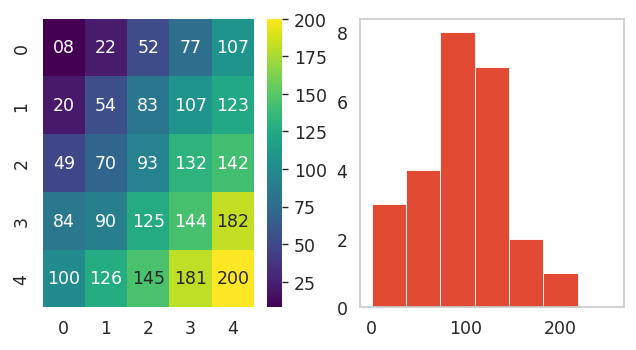

In [22]:
import numpy as np
np.random.seed(2019)
xx = np.stack([np.arange(5)]*5, -1)
yy = xx.T
bins_sample_8bit = np.linspace(0, 255, 8)
sample_img = (25*(xx+yy)+np.random.uniform(-10, 10, size=(5, 5))).astype('uint8')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.heatmap(sample_img, annot=True,fmt='02d', ax=ax1, cmap='viridis')
ax2.hist(sample_img.ravel(), bins_sample_8bit, label='Original', alpha=1)

In [23]:
all_images = sorted(list(df_bf['uri'].head(18)))

In [25]:
all_images

['s3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/0bcda86b-c330-4e78-8dff-68f69929e2aa.tif',
 's3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/23a51179-2fc5-4d11-aeb2-20302195dd88.tif',
 's3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/3a2c4716-0c57-4347-bc07-61531ac03e0a.tif',
 's3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/3c1c7d85-dd9b-42be-8778-0c18d6553bfe.tif',
 's3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/483f0384-d68e-4af2-abc8-8b6bebc5c956.tif',
 's3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/6e18305f-31a0-4328-84d2-09eed1866779.tif',
 's3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/7177b6c6-6fad-44e3-b3f7-8cfb289e83b4.tif',
 's3://syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/815c21ae-2399-4800-83e2-55bfbb91aebe.tif',
 's3://syedazi-demo-cont

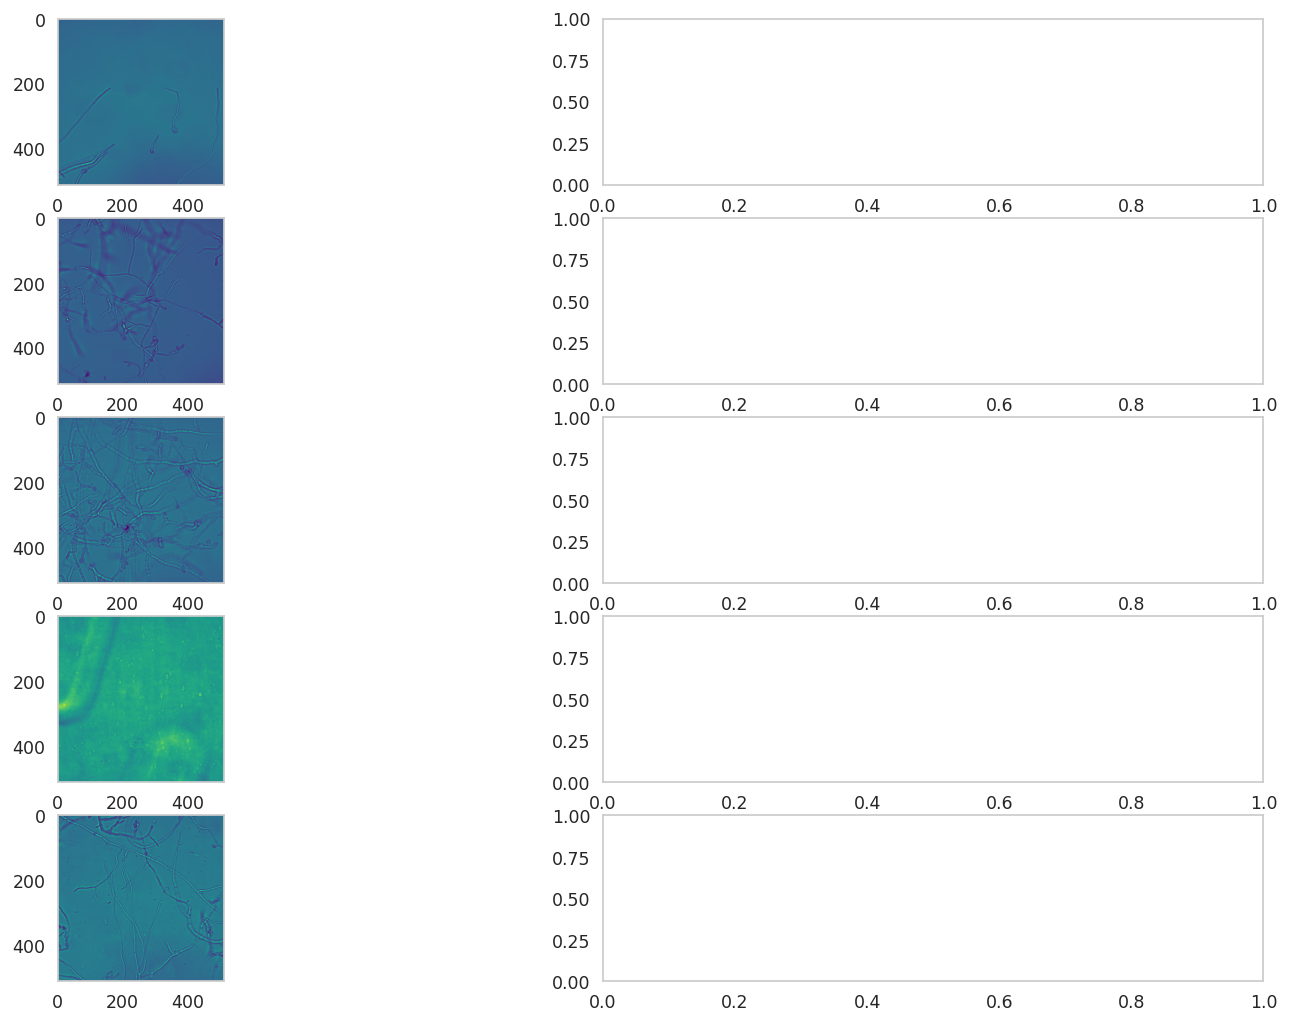

In [31]:
import numpy as np
bins_8bit = np.linspace(0, 255, 26)
fig, m_axs = plt.subplots(5, 2, figsize=(15, 10))
for (c_ax, d_ax), c_image_path in zip(m_axs, all_images):
    url = urlparse(c_image_path)
    bucket = url.netloc
    key = url.path[1:]
    file_byte_string = client.get_object(Bucket=bucket, Key=key)["Body"].read()
    image = PIL.Image.open(BytesIO(file_byte_string))
    #gray_img = image.convert("L")
    #c_img = imread(image, as_gray=True)
    c_ax.imshow(image)
    image.histogram()

In [32]:
#!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/b7/8a/b2f7e1a434d56bf1d7570fc5941ace0847404e1032d7f1f0b8fed896568d/opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 18.3 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [32]:
import cv2
cv2_img = cv2.imread('data/images/910dd971-aa62-4715-a4b3-d0491dbe97be.tif', cv2.IMREAD_GRAYSCALE)
#cv2_img = cv2.imread('data/images/3c1c7d85-dd9b-42be-8778-0c18d6553bfe.tif', cv2.IMREAD_GRAYSCALE)

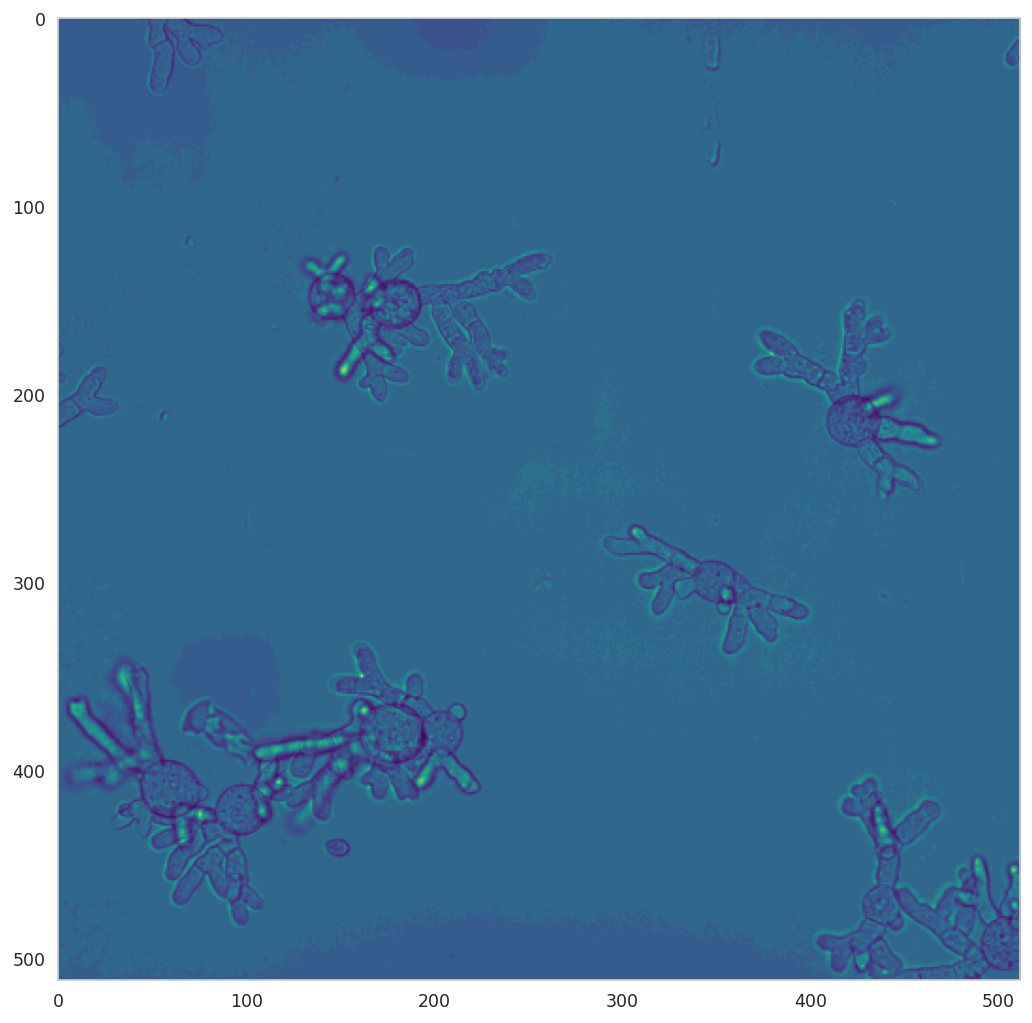

In [45]:
import matplotlib.pylab as plt
plt.imshow(cv2_img)

In [46]:
from skimage.exposure import rescale_intensity

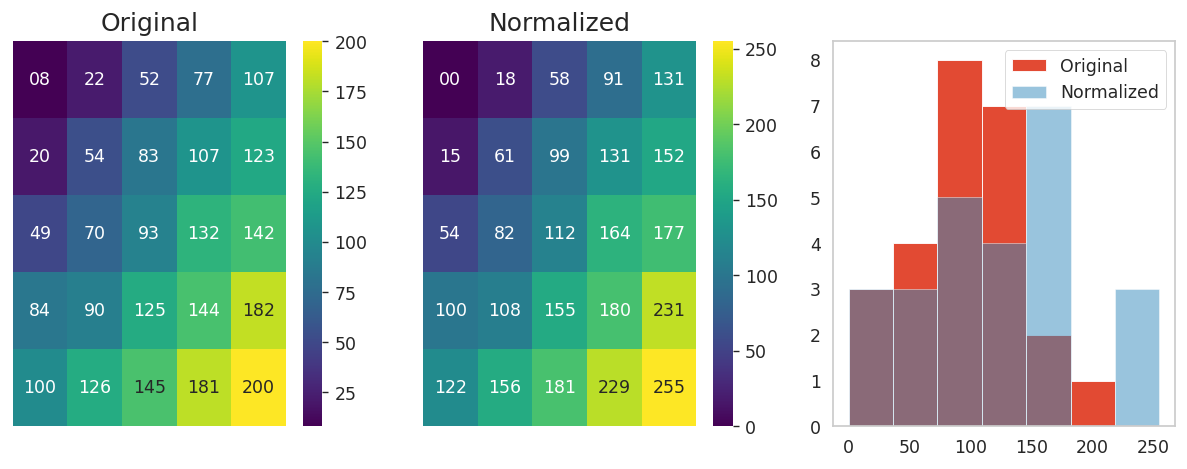

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.heatmap(sample_img, annot=True,fmt='02d', ax=ax1, cmap='viridis')
ax1.set_title('Original')
ax1.axis('off')
trans_img = rescale_intensity(sample_img)
trans_name = 'Normalized'
sns.heatmap(trans_img, annot=True,fmt='02d', ax=ax2, cmap='viridis')
ax2.set_title(trans_name)
ax2.axis('off')
ax3.hist(sample_img.ravel(), bins_sample_8bit, label='Original', alpha=1)
ax3.hist(trans_img.ravel(), bins_sample_8bit, label=trans_name, alpha=0.5)
ax3.legend()

FileNotFoundError: [Errno 2] No such file or directory: '/root/bayer-crop-science/dino-cell-phenotyping/s3:/syedazi-demo-content-aiml-team/bayer-crop-science-poc/fungi-cell/images/0bcda86b-c330-4e78-8dff-68f69929e2aa.tif'

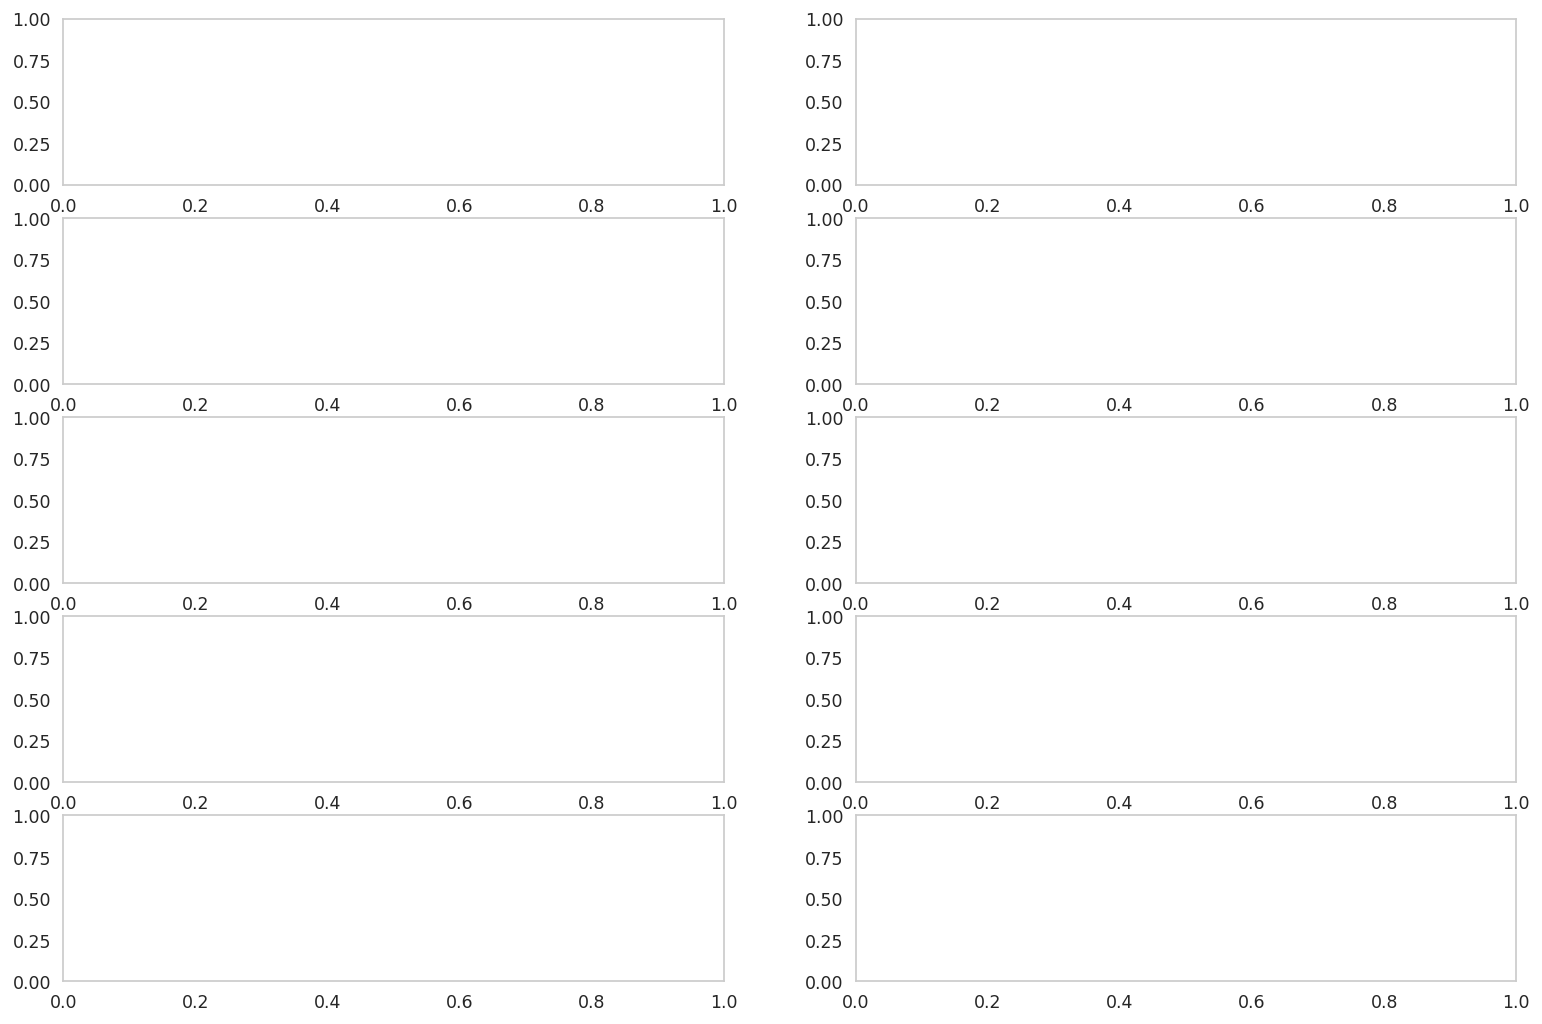

In [36]:
fig, m_axs = plt.subplots(5, 2, figsize=(15, 10))
for (c_ax, d_ax), c_image_path in zip(m_axs, all_images):
    c_img = imread(c_image_path)
    n_img = rescale_intensity(c_img)
    c_ax.imshow(n_img)
    c_ax.set_title('Old Range {}\nNew Range {}'.format((c_img.min(), c_img.max()), 
                                                       (n_img.min(), n_img.max())))
    d_ax.hist(n_img.ravel(), bins_8bit)

In [22]:
np.quantile(cv2_img, 0.1)

8.0

In [23]:
np.quantile(cv2_img, 0.9)

9.0

In [24]:
cv2_img.max()

25

In [25]:
cv2_img.min()

1

In [26]:
cv2_img.std()

1.0040308150445967

In [47]:
from skimage.exposure import equalize_adapthist, equalize_hist
image = equalize_adapthist(cv2_img)

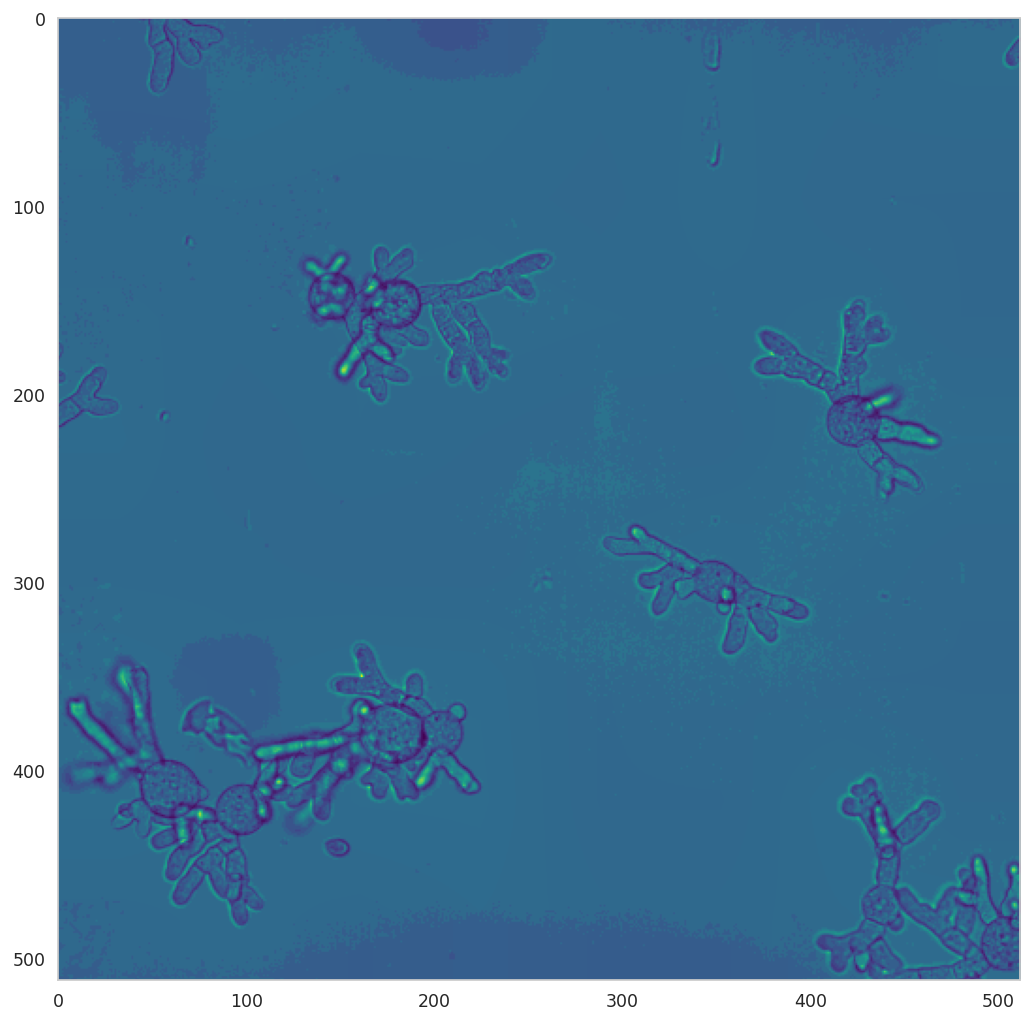

In [48]:
plt.imshow(image)

In [49]:
def rescale_intensity(img, q):

    import numpy as np
    import skimage as sk

    img = sk.exposure.rescale_intensity(
        img, in_range=tuple(np.quantile(img, q=(q, 1 - q)))
    )
    return img

In [50]:
image = rescale_intensity(image, q=1e-2)

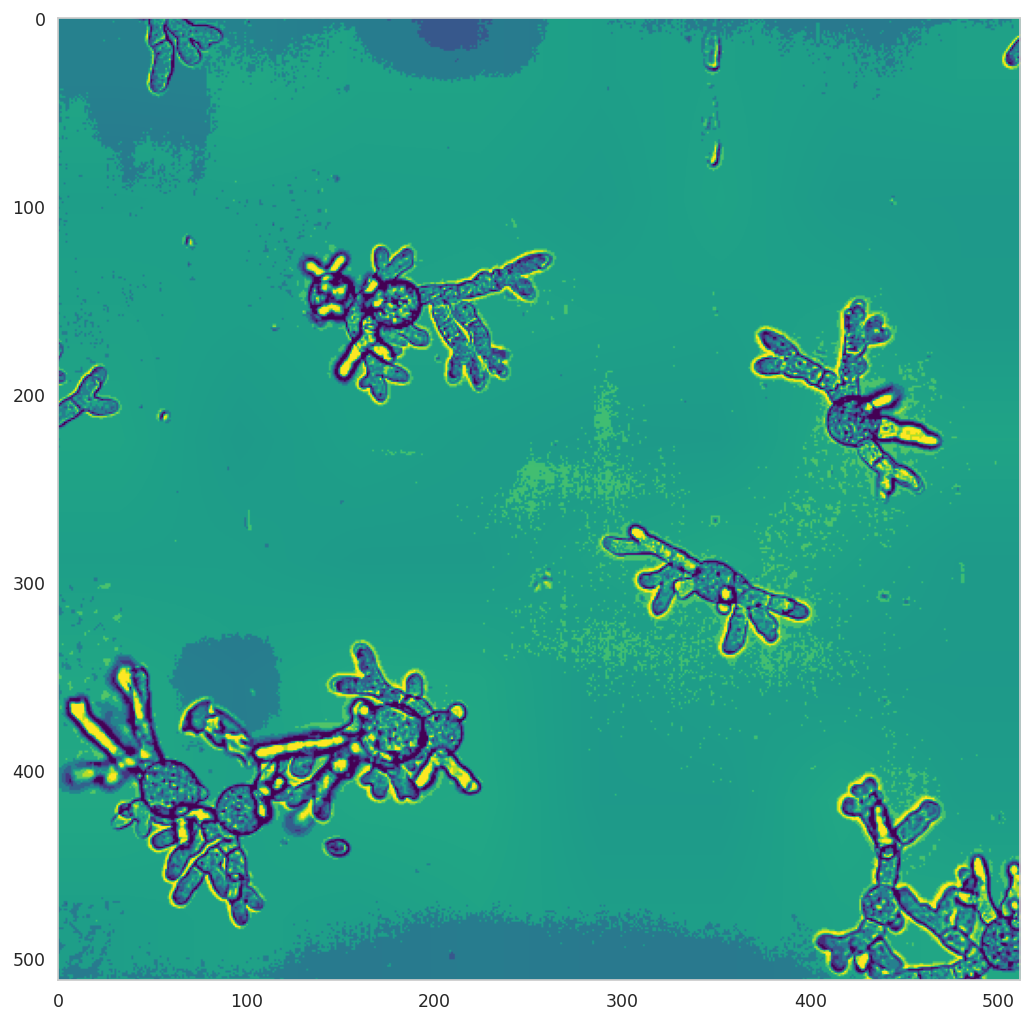

In [51]:
plt.imshow(image)

In [128]:
image = image / image.max()

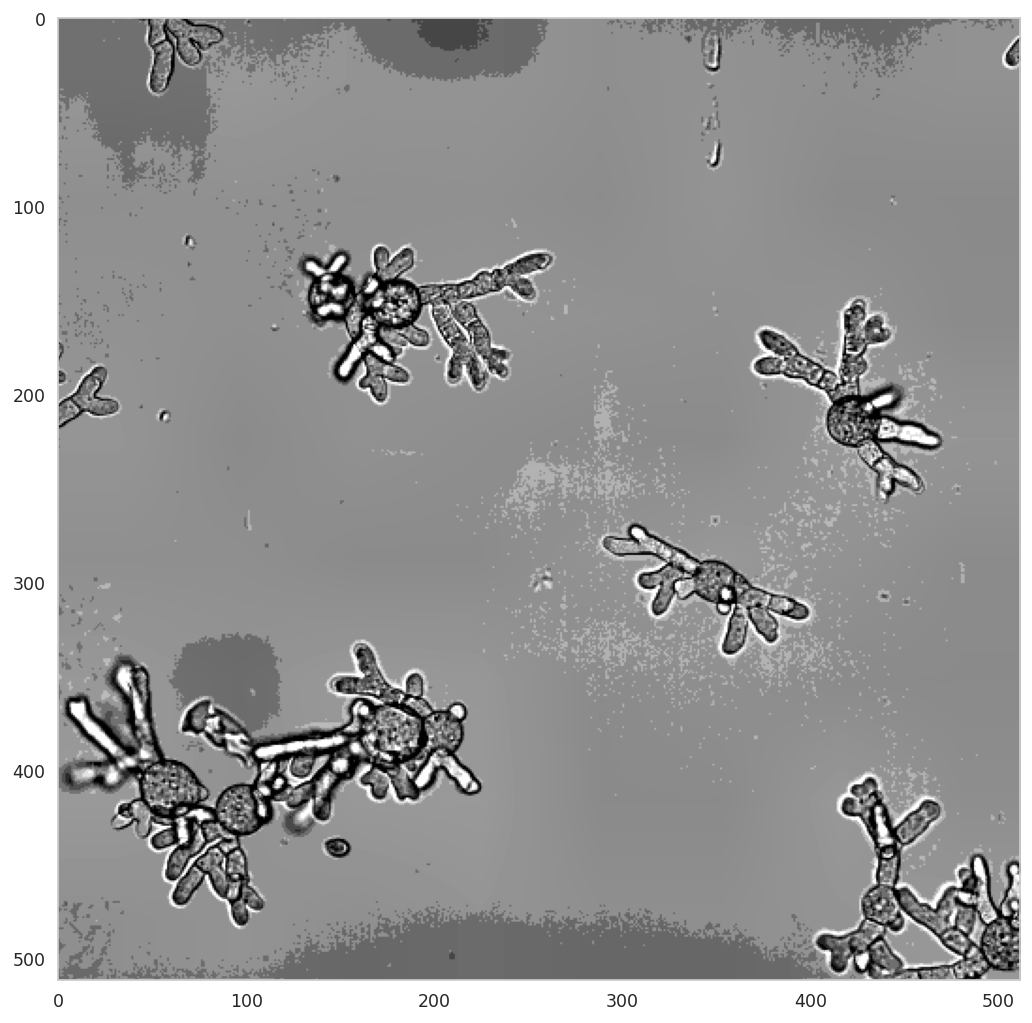

In [129]:
plt.imshow(image)

In [130]:
image = image/np.iinfo(np.uint16).max

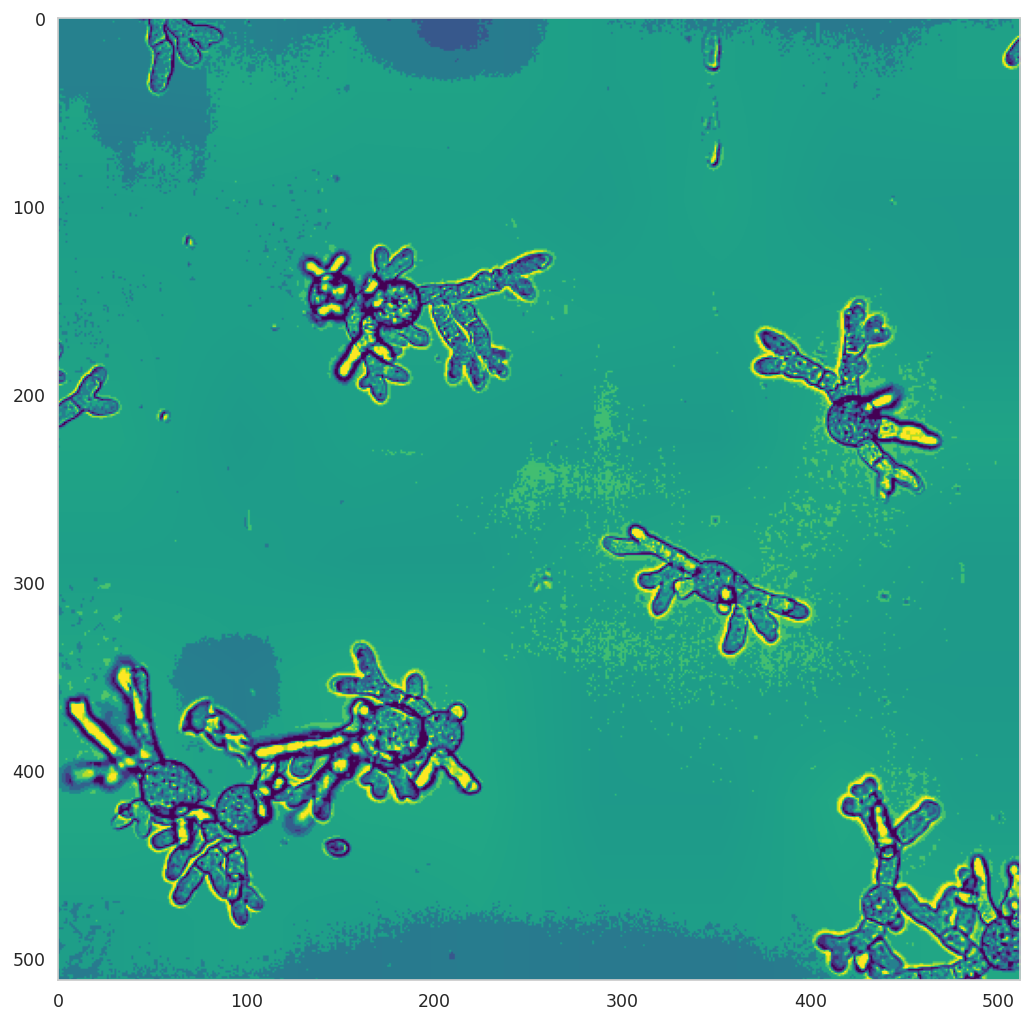

In [52]:
plt.imshow(image)

In [132]:
image.size

262144

In [53]:
"""
Show binary image, ROIs and labelled image.
"""
from scipy import ndimage
from skimage.filters import threshold_otsu, threshold_triangle
from skimage.color import label2rgb
from skimage.segmentation import mark_boundaries

bw = image > threshold_otsu(image)

In [63]:
from skimage.util import img_as_ubyte
binary = img_as_ubyte(bw) 

In [67]:
        image = PIL.Image.fromarray(binary).convert('L')
        image = np.array(image) / 255.0


In [68]:
image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

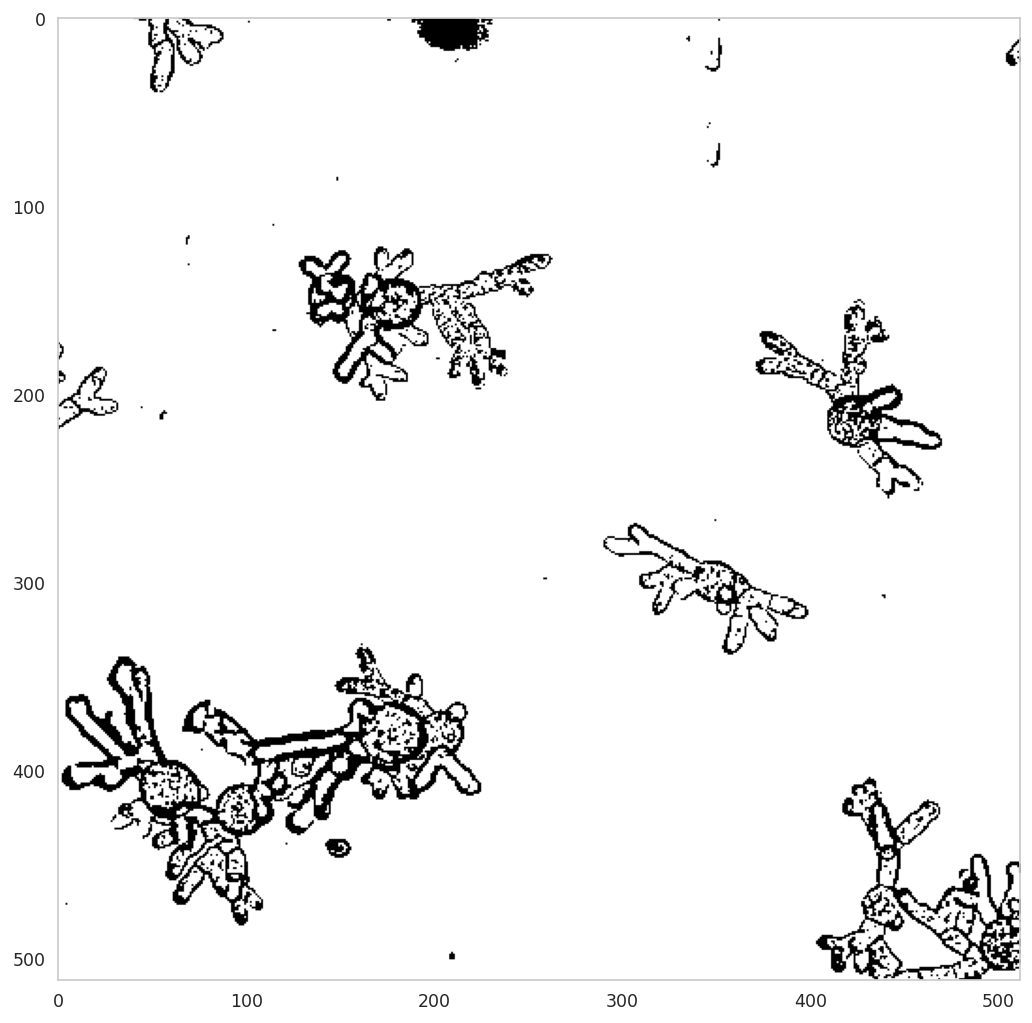

In [54]:
plt.imshow(bw, cmap='gray')

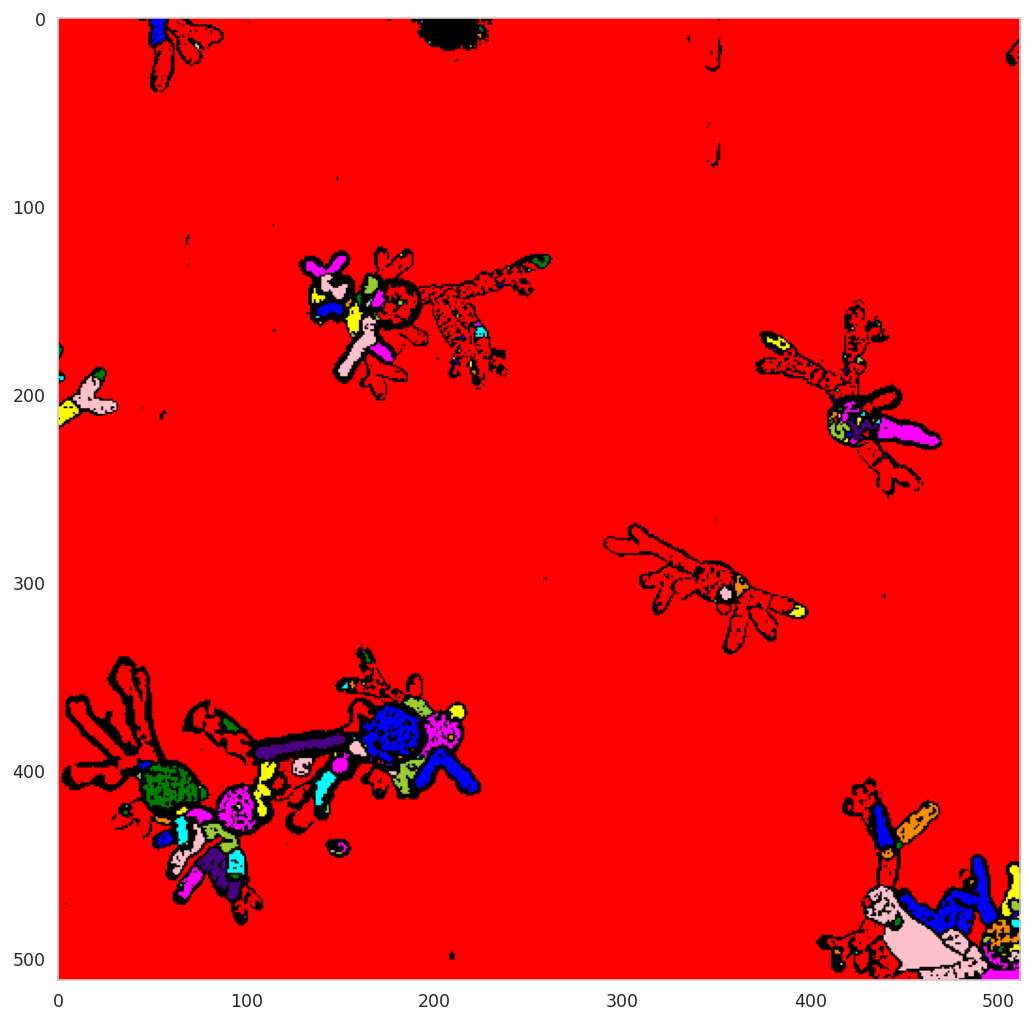

In [135]:
plt.imshow(label2rgb(lab, bg_label=0))

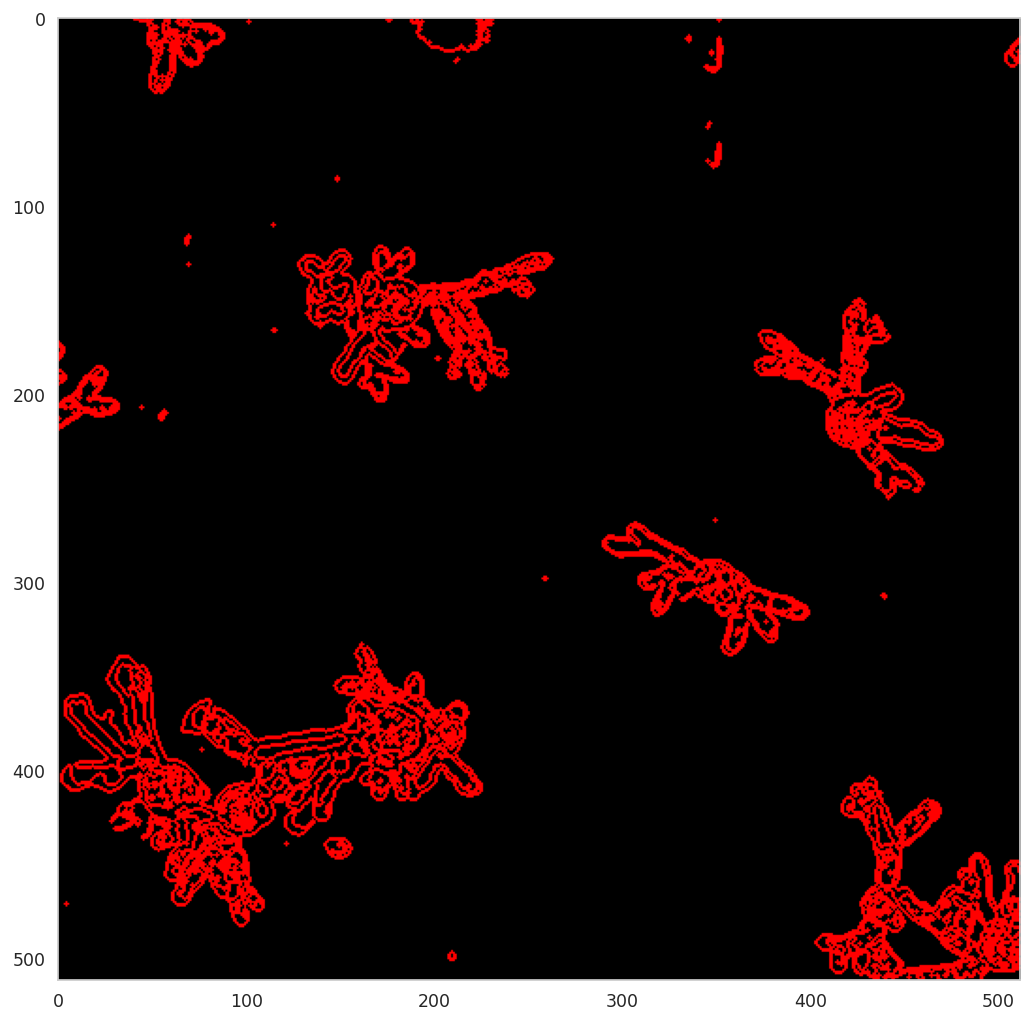

In [136]:
plt.imshow(mark_boundaries(image, lab, mode='thick', color=(1, 0, 0)))

### Thresholding: Using CV2

In [73]:
image2 = image.astype("uint16")

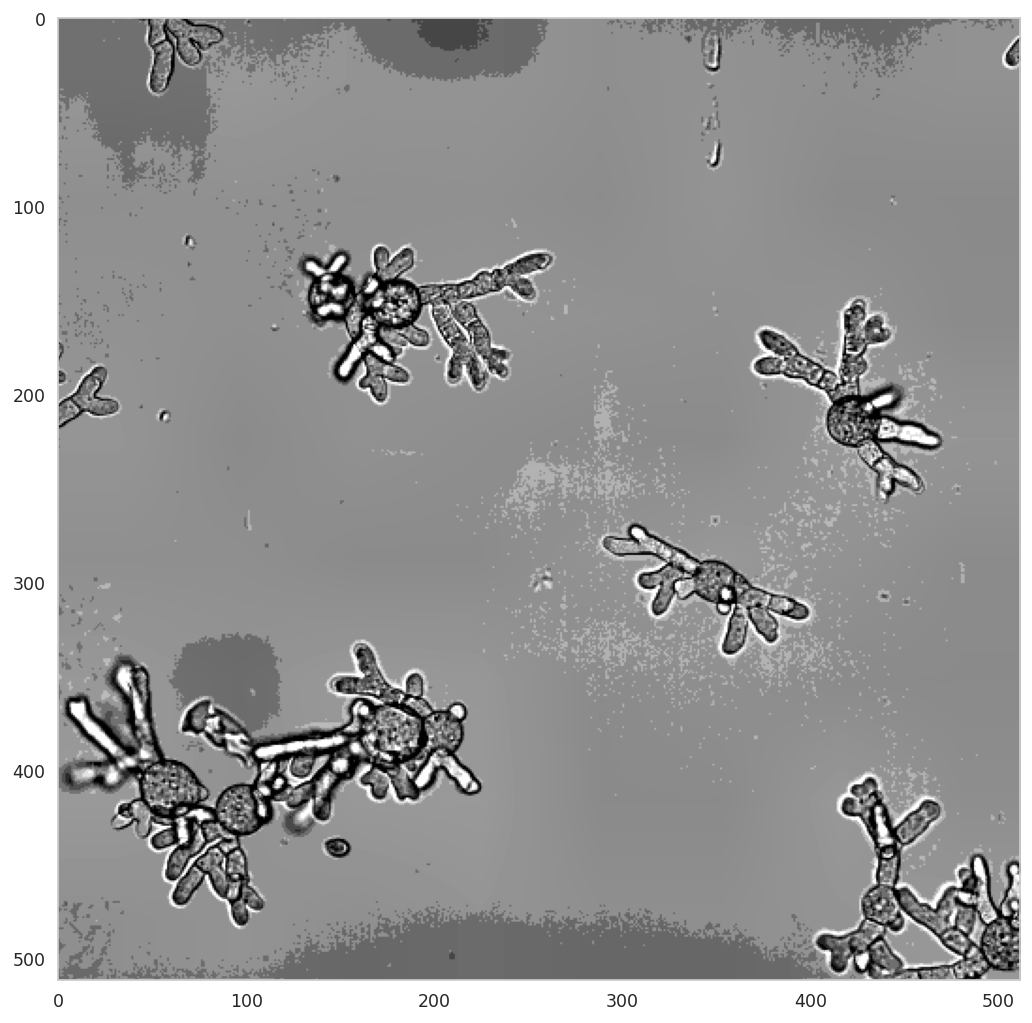

In [137]:
plt.imshow(image, cmap="gray")

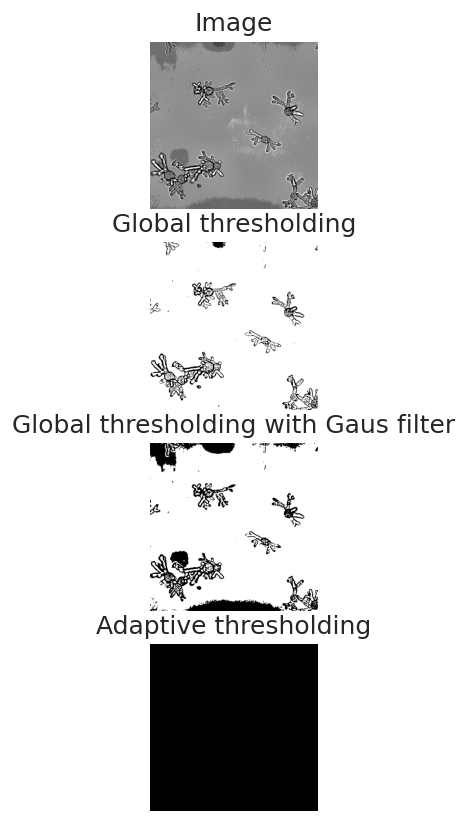

In [138]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, gaussian


global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

gau_image = gaussian(image, sigma=5, truncate=1/5)
global_thresh = threshold_otsu(gau_image)
binary_global_gau = gau_image > global_thresh

block_size = 19
adaptive_thresh = threshold_local(image, block_size, offset=10)
binary_adaptive = image > adaptive_thresh

fig, axes = plt.subplots(nrows=4, figsize=(10, 8))
ax0, ax1, ax2, ax3 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image')

ax1.imshow(binary_global)
ax1.set_title('Global thresholding')

ax2.imshow(binary_global_gau)
ax2.set_title('Global thresholding with Gaus filter')

ax3.imshow(binary_adaptive)
ax3.set_title('Adaptive thresholding')

for ax in axes:
    ax.axis('off')

plt.show()

In [139]:
def create_disk(radius: int):
    """
    Create a circular structuring element.
    This is essentially the binary/morphological equivalent the filter kernel.
    """
    r = radius
    x = np.arange(-r, r+1)
    y = np.arange(-r, r+1)
    y, x = np.meshgrid(x, x)
    return x*x + y*y <= r*r

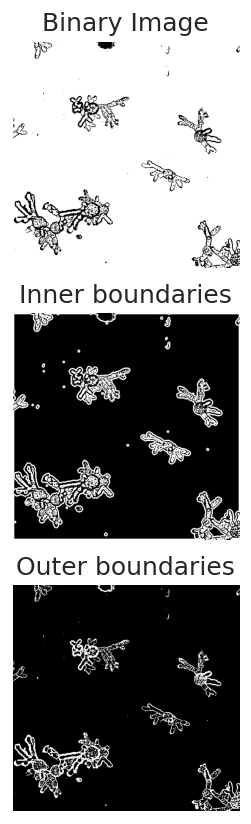

In [140]:
from scipy import ndimage

# Define radius (change this to update the figure!)
radius = 3

# Create structuring element
strel = create_disk(radius)

# Load image & process
bw_eroded = ndimage.binary_erosion(binary_global, structure=strel)
bw_dilated = ndimage.binary_dilation(binary_global, structure=strel)

fig, axes = plt.subplots(nrows=3, figsize=(8, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(binary_global)
ax0.set_title('Binary Image')

ax1.imshow(binary_global ^ bw_eroded)
ax1.set_title('Inner boundaries')

ax2.imshow(bw_dilated ^ binary_global)
ax2.set_title('Outer boundaries')

for ax in axes:
    ax.axis('off')

plt.show()

In [ ]:
# Compute the Canny filter for two values of sigma
edges1 = canny(image)
edges2 = sobel(image)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Sobel filter', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

(-0.5, 511.5, 511.5, -0.5)

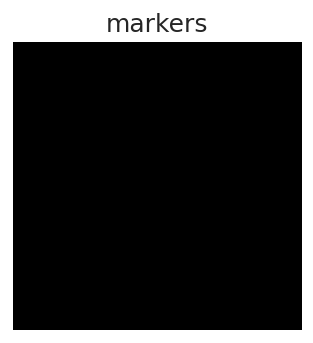

In [113]:
markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

In [114]:
from skimage import segmentation

segmentation_im = segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_im, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

TypeError: No matching signature found